In [22]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Ankita\Desktop\ML\Datasets\cleaned_attrition.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,0.742527,2,1,2,1,2,...,3,1,0,8,0,1,6,4,0,-0.108350
1,1,49,0,1,-1.297775,1,8,1,1,3,...,4,4,1,10,3,3,10,7,1,-0.291719
2,2,37,1,2,1.414363,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,-0.937654
3,3,33,0,1,1.461466,1,3,4,1,4,...,3,3,0,8,3,3,8,7,3,-0.763634
4,4,27,0,2,-0.524295,1,2,1,3,1,...,3,4,1,6,3,3,2,2,2,-0.644858


In [5]:
df.drop(df.columns[0], axis='columns', inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,0.742527,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,-0.108350
1,49,0,1,-1.297775,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,-0.291719
2,37,1,2,1.414363,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,-0.937654
3,33,0,1,1.461466,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,-0.763634
4,27,0,2,-0.524295,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,-0.644858


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [8]:
X=df.drop(columns=['Attrition'])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,0.742527,2,1,2,1,2,0,1.383138,...,3,1,0,8,0,1,6,4,0,-0.108350
1,49,1,-1.297775,1,8,1,1,3,1,-0.240677,...,4,4,1,10,3,3,10,7,1,-0.291719
2,37,2,1.414363,1,2,2,4,4,1,1.284725,...,3,2,0,7,3,3,0,0,0,-0.937654
3,33,1,1.461466,1,3,4,1,4,0,-0.486709,...,3,3,0,8,3,3,8,7,3,-0.763634
4,27,2,-0.524295,1,2,1,3,1,1,-1.274014,...,3,4,1,6,3,3,2,2,2,-0.644858


In [9]:
Y=df['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [11]:
X_train.shape

(1176, 30)

In [12]:
X_test.shape

(294, 30)

#### Checking for best value of k in KNN

In [48]:
ac_train = []
ac_test = []

for i in range(1,41):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    Y_train_predict = model.predict(X_train)
    ac_train.append(accuracy_score(Y_train, Y_train_predict))
    Y_test_predict = model.predict(X_test)
    ac_test.append(accuracy_score(Y_test, Y_test_predict))

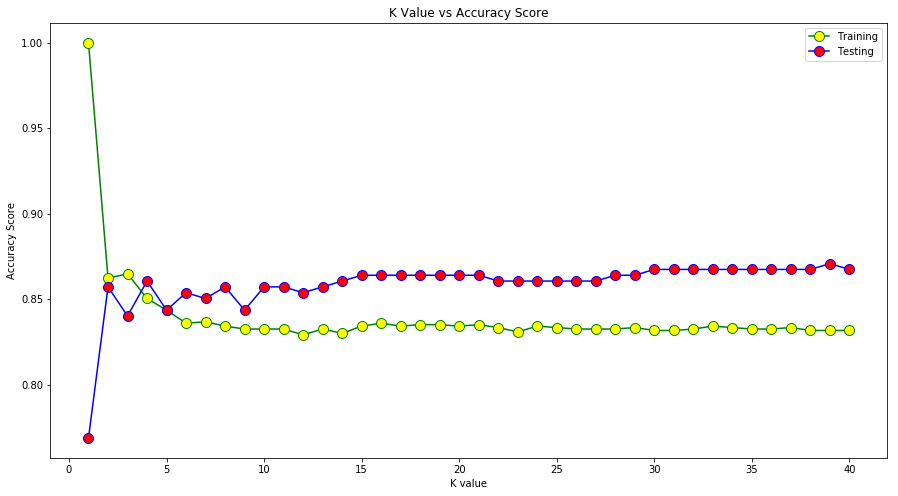

In [49]:
plt.figure(figsize=(15,8))

plt.plot(range(1,41), ac_train, color='green', marker='o', markerfacecolor='yellow', markersize=10, label='Training')
plt.plot(range(1,41), ac_test, color='blue', marker='o', markerfacecolor='red', markersize=10, label='Testing')

plt.xlabel('K value')
plt.ylabel('Accuracy Score')
plt.title('K Value vs Accuracy Score')
plt.legend()

plt.show()

In [50]:
max_index = np.argmax(ac_test)
max_index

38

In [51]:
print(ac_train[38], ac_test[38])
print(ac_train[3], ac_test[3])
print(ac_train[4], ac_test[4])

0.8316326530612245 0.8707482993197279
0.8503401360544217 0.8605442176870748
0.8435374149659864 0.8435374149659864


#### Checking for best value of max_depth in Decision Tree

In [32]:
ac_train = []
ac_test = []

for i in range(1,41):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, Y_train)
    Y_train_predict = model.predict(X_train)
    ac_train.append(accuracy_score(Y_train, Y_train_predict))
    Y_test_predict = model.predict(X_test)
    ac_test.append(accuracy_score(Y_test, Y_test_predict))

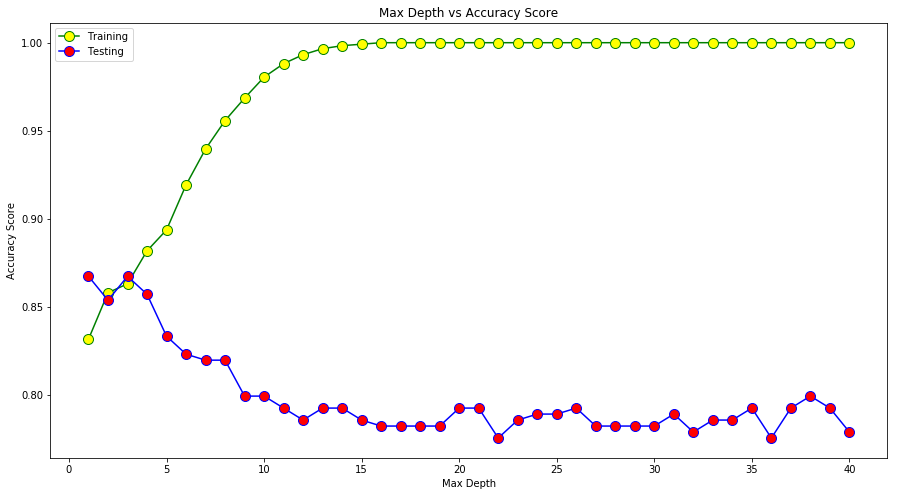

In [33]:
plt.figure(figsize=(15,8))

plt.plot(range(1,41), ac_train, color='green', marker='o', markerfacecolor='yellow', markersize=10, label='Training')
plt.plot(range(1,41), ac_test, color='blue', marker='o', markerfacecolor='red', markersize=10, label='Testing')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Max Depth vs Accuracy Score')
plt.legend()

plt.show()

In [34]:
max_index = np.argmax(ac_test)
max_index

0

In [35]:
print(ac_train[0], ac_test[0])
print(ac_train[2], ac_test[2])

0.8316326530612245 0.8673469387755102
0.8630952380952381 0.8673469387755102


### Voting Classifier

In [60]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=39)
dt = DecisionTreeClassifier(max_depth=3)
nb = GaussianNB()

vc = VotingClassifier(estimators=[('lr', lr),
                                  ('knn', knn),
                                  ('dt', dt),
                                  ('nb', nb)
                                 ], voting='hard')

In [61]:
ac_train = []
ac_test = []

for clf in (lr, knn, dt, nb, vc):
    clf.fit(X_train, Y_train)
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    ac1 = accuracy_score(Y_train, Y_pred_train)
    ac2 = accuracy_score(Y_test, Y_pred_test)
    ac_train.append(ac1)
    ac_test.append(ac2)
    print(clf.__class__.__name__, ac1, ac2)

C:\Users\Ankita\Python 3.7.2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ankita\Python 3.7.2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.8715986394557823 0.8707482993197279
KNeighborsClassifier 0.8316326530612245 0.8707482993197279
DecisionTreeClassifier 0.8630952380952381 0.8673469387755102
GaussianNB 0.7976190476190477 0.8333333333333334
VotingClassifier 0.8494897959183674 0.8741496598639455
